In [1]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import adds feature, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
from IPython.display import display, Math, clear_output

import sympy 
from sympy import *
from sympy.physics.vector import ReferenceFrame, CoordinateSym
from sympy.vector import CoordSys3D, divergence, curl

import ipyvolume as ipv
import time
from ipywidgets import Output, interact
import ipywidgets as widgets
np.seterr(divide='ignore', invalid='ignore')
init_printing()

## Laplace's Equation:
* In a space with a volume charge density Poisson's equation is: $ \nabla^{2}V = -\rho/\epsilon_0$ 
* In a space with *no charge* the Laplacian of the potential is given as:
$ \nabla^{2}V = 0$  <-- This is Laplace's equation. 
* Given boundary conditions, i.e. the potential specified around the edges, we can solve Laplace's equation to find the voltage everywhere.

## The Laplacian 
* Recall the Laplacian is the divergence of the gradient:
$\nabla \cdot \nabla V = (\frac{\partial}{\partial x} \hat{x} + \frac{\partial}{\partial y} \hat{y} + \frac{\partial}{\partial z} \hat{z} ) \cdot (\frac{\partial V}{\partial x} \hat{x} + \frac{\partial V}{\partial y} \hat{y} + \frac{\partial V}{\partial z} \hat{z}) = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}$ 

**The Laplace equation in words**: at every point the amount you can go up is equal to the amount you can go down (if all directions are considered). 


## Laplace's Equation in Practice 
Laplace's equation is used to:
1. Solve for **electrostatic potentials** given boundary conditions (voltages at the edges).  
2. Solve for **temperature** throughout a volume given boundary conditions and no heat sources.
3. **Fluid flow**
4. **Gravitation** 

## Laplace's Equation in 1D
* $\frac{\partial^2 V}{\partial^2 x} = 0$
So what does this mean? 


The solution is a linear function of the form $ V(x) = mx + b$

If one end of a rod is at 10 $^\circ$C and the other end of the rod is at 60 $^\circ$C. The temperature will vary linearly between those two ends. 

Question: How many boundary conditions do we need to solve Laplace's equation in 1D?


<IPython.core.display.Javascript object>


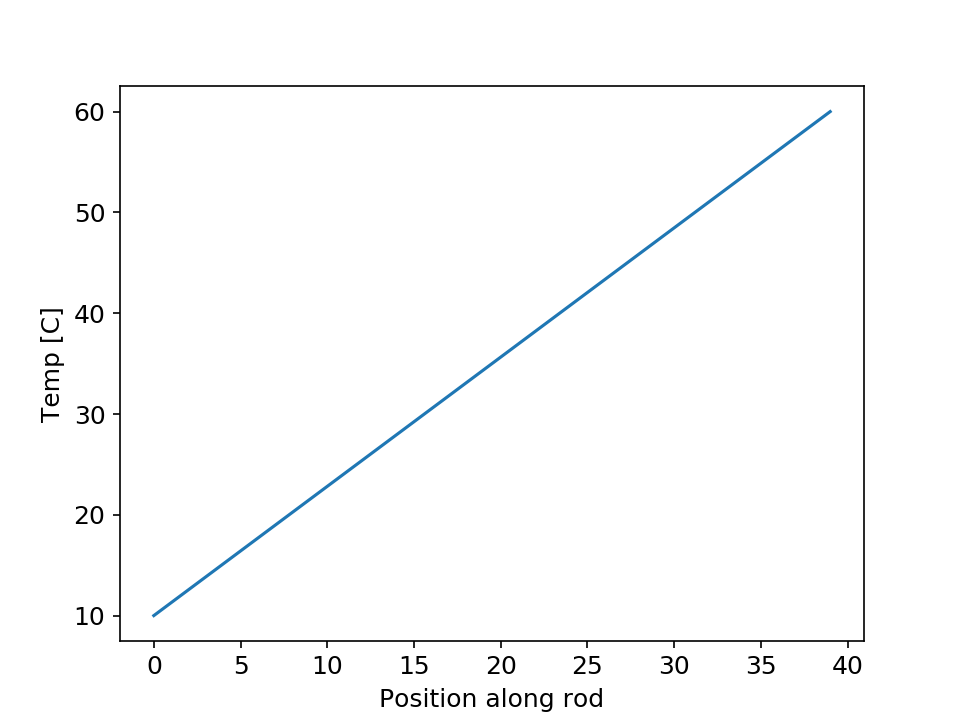

Text(0.5, 0, 'Position along rod')

In [3]:
plt.ion()
plt.figure()
plt.plot(np.linspace(10, 60, 40))
plt.ylabel('Temp [C]')
plt.xlabel('Position along rod')

## Laplace's Equation in 1D: Takeaways
* Any point is the average of its neighbors -- remember that at each point there must be an equal opportunity to go down as to go up. 
- $V(x) = \frac{1}{2} [ V(x+a) + V(x-a)]$ for small $a$
* Each point is an average of neighbors implies that the interior of the solutions has no **maximums** nor **minimums**. 

## Laplace's Equation in 2D 

$\frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} = 0$

### Average of neighbors
The assertion that every point is the average of its neighbors is equivalent to:

$ V(x,y) = \frac{1}{2 \pi R} \oint V dl$ 

where the integral is around a circle that surrounds point $x,y$

### No Max and No Min in the Interior

If $x,y$ was a maximum:
$ V(x,y) = \frac{1}{2 \pi R} \oint V dl$ 
would be false

If $x,y$ was a minimum 
$ V(x,y) = \frac{1}{2 \pi R} \oint V dl$ 
would be false

### A Saddle Point is OK (minimax point)
At a saddle point: The slopes in orthogonal directions are both zero but the point is not an extrememum. 
![img](saddle_point.png "Saddle Point Example")


In [4]:
# Iterative solution to Laplace's Equation in 2D 
# plot first guess 
# iteration 10 
# iteration 20 
# iteration 500 

def draw_plot(x, y, U, plt_title=''):
    plt.ion()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')    
    ax.clear()
    ax.set_zlim(-3, 6)
    ax.plot_surface(x, y, U, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)
    ax.set_title(plt_title)
    return ax
    
def update_plot(x, y, U, ax, plt_title=''): 
    print('update')
    ax.clear()
    ax.set_zlim(-3, 6)
    ax.plot_surface(x, y, U, rstride=1, cstride=1, cmap=cm.coolwarm,
                    linewidth=0, antialiased=True)
    ax.set_title(plt_title)

<IPython.core.display.Javascript object>


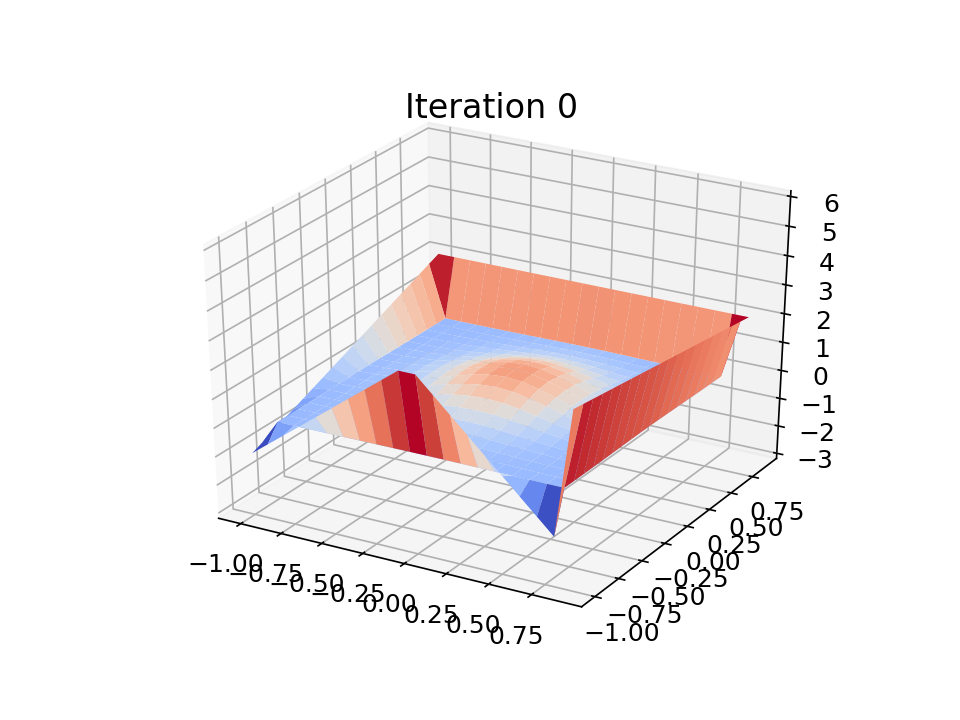

In [5]:
# Create 21x21 mesh grid
m = 21
mesh_range = np.arange(-1, 1, 2/(m-1))
x, y = np.meshgrid(mesh_range, mesh_range)

# Initial condition
bc = 3
U = np.exp(-5 * (x**2 + y**2))
# U[0,:] = bc
# U[m-2,:] = bc
# U[:,0] = bc
# U[:,m-2] = bc
U[0,:] = np.hstack([np.linspace(-1,3,10), np.linspace(3,-2,10)])
U[m-2,:] = np.linspace(2,2,20)
U[:,0] = np.linspace(-1,2,20)
U[:,m-2] = np.linspace(3,2,20)

plot_iter = np.array([1,20,499])
U_iter = np.repeat(U[:,:,np.newaxis], 500, axis=2)

draw_plot(x, y, U_iter[:,:,0], plt_title = 'Iteration 0')

<IPython.core.display.Javascript object>


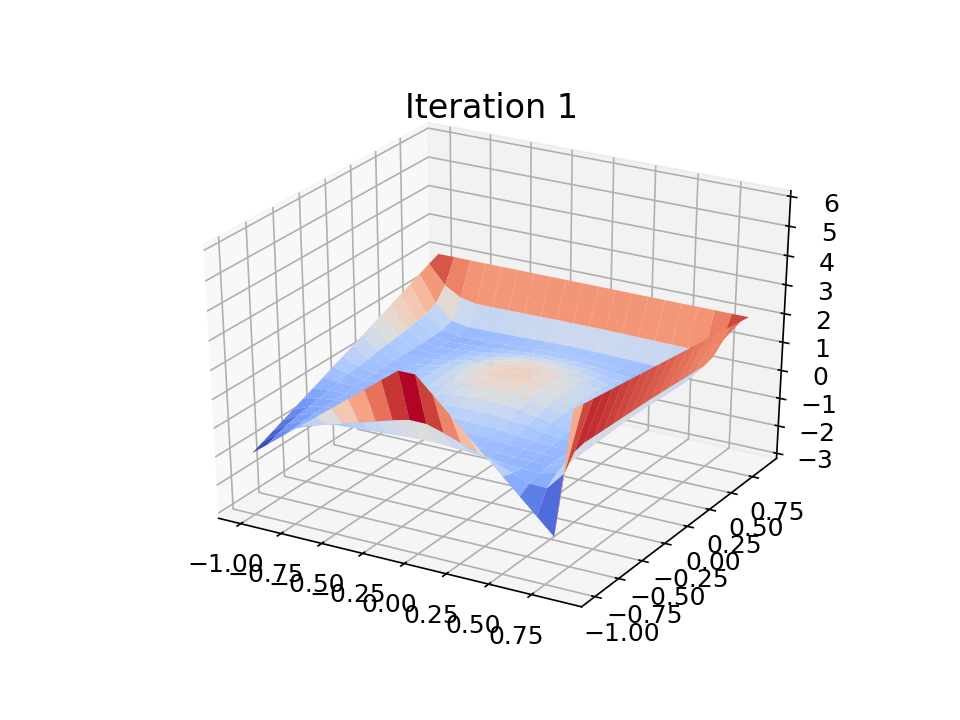

<IPython.core.display.Javascript object>


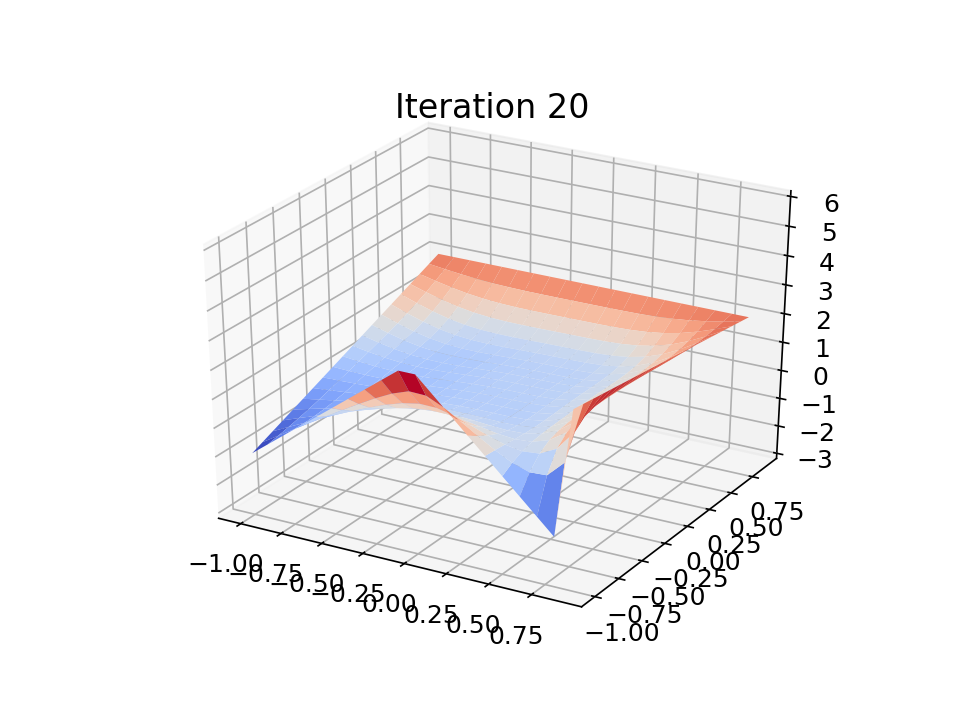

<IPython.core.display.Javascript object>


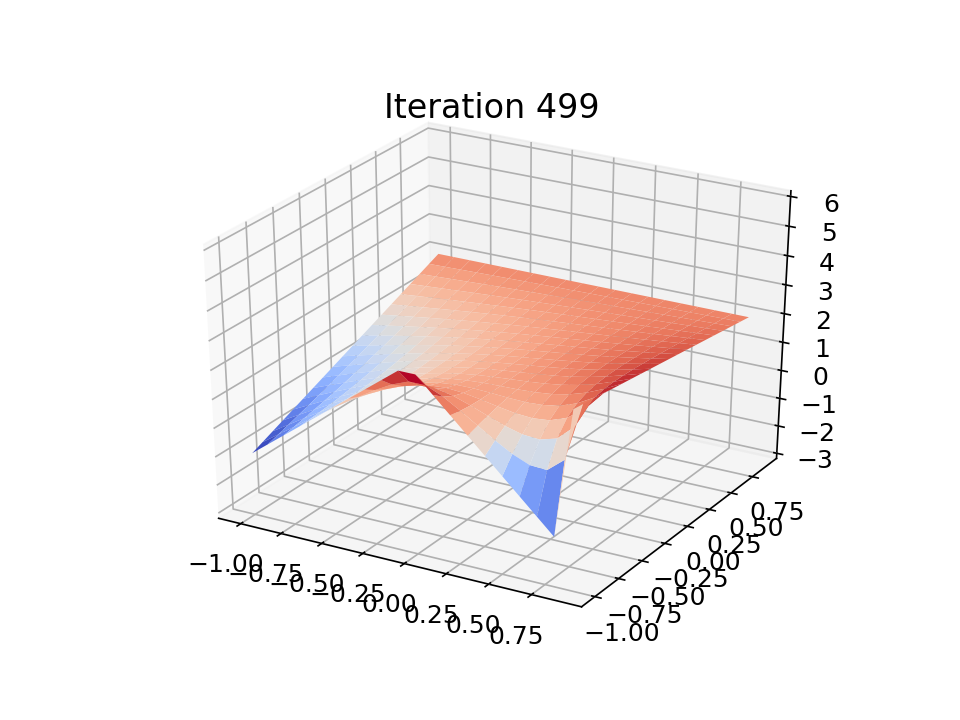

In [6]:
n = list(range(1, m-1)) + [m-2]
e = n
s = [0] + list(range(0, m-2))
w = s

def pde_step(U):
    """ PDE calculation at a single time step t. 
    Replace each value with the value of its neighbors.  """
    return (U[n, :]+U[:, e]+U[s, :]+U[:, w])/4.

k = 5
U_step = U

for it in range(500):
    U_step = pde_step(U_step)
    U_step[0,:] = np.hstack([np.linspace(-1,3,10), np.linspace(3,-2,10)])
    U_step[m-2,:] = np.linspace(2,2,20)
    U_step[:,0] = np.linspace(-1,2,20)
    U_step[:,m-2] = np.linspace(3,2,20)
    
    U_iter[:,:,it] = U_step
    # Every iteration that matches selected array, plot the value 
    if it in plot_iter:
        draw_plot(x, y, U_step, plt_title = 'Iteration {}'.format(it))

In [ ]:
ax = draw_plot(x, y, U_iter[:,:,5], plt_title='Iteration {}'.format(5))

def update(iteration=widgets.IntSlider(min=0,max=500,step=1,value=0)):
    update_plot(x, y, U_iter[:,:,iteration], ax, plt_title = 'Iteration {}'.format(iteration))

interact(update);